# Training an Image Recognition Model

The final section of this tutorial is more useful when targeting specific image recognition tasks that can't be dont using pretrained models, as these objects may not have been included in those models, and thus will not be recognized. In this tutorial, we will train a classification model to recognize handwritten numerical digits 0-9. Classification of handwritten symbols can be generalized to be used to document written texts, improve human computer interface efficiency, etc.

The training dataset *digits* includes 1000 training images, as well as 200 validation images, per image. There are also two small folders of test digits, *test-data*, which includes separate images taken from the same dataset, and *test-data2*, which contains images downloaded from Google search. 

First, import the required training library from imageai:

In [0]:
from imageai.Prediction.Custom import ModelTraining

Here, a trainer object, *model_trainer*, is initialized. We swill use the InceptionV3 model here, with the training data directory set to *digits*. Wehn executing the *trainModel* function, *num_objects* is set to 10 since there are 10 digit objects in our data, and we will run *num_experiments*=15 times to find the best model (more runs mean a more accurate model, with diminishing return). Finally, *set_network_summary* is true, to display the following outputs of training. 

**This training was run on a Google cloud server using an Nvidia K80 GPU and tensorflow GPU. Total training time was 2 hours. Training on a local machine may take several hours or days.**



In [15]:
# define model trainer and train data
model_trainer = ModelTraining()
model_trainer.setModelTypeAsInceptionV3()
model_trainer.setDataDirectory('digits')
model_trainer.trainModel(num_objects=10, num_experiments=15, show_network_summary=True)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_376 (Conv2D)             (None, 111, 111, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1_376 (Bat (None, 111, 111, 32) 96          conv2d_376[0][0]                 
__________________________________________________________________________________________________
activation_376 (Activation)     (None, 111, 111, 32) 0           batch_normalization_v1_376[0][0] 
__________________________________________________________________________________________________
conv2d_377

As we see in the output, models improved from epoch 1-11, wth no improvements from 12-15. 

# Predicting using custom model

Now, we will use the model we generated to predict a few handwritten images.

Import the custom prediction library from imageai:

In [0]:
from imageai.Prediction.Custom import CustomImagePrediction

Load in the model, similar to loading in pretrained models (except now the models were generated from our data). For custom models, we pass in the number of objects we trained on, 10. We are still using InceptionV3. 

In [0]:
# load custom prediction model
prediction = CustomImagePrediction()
prediction.setModelTypeAsInceptionV3()
prediction.setModelPath('digits/models/model_ex-010_acc-0.999556.h5')
prediction.setJsonPath('digits/json/model_class.json')
prediction.loadModel(num_objects=10)

Load the test image files from *test-data* to the *images* array.

We are using [Pillow](https://pillow.readthedocs.io/en/stable/) and [Ipython](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html) to print the images to the notebook.

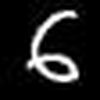

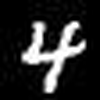

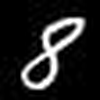

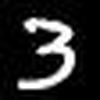

In [45]:
import os
from PIL import Image
from IPython.display import display

# load image files into array and print images from test-data
images = []
all_files = os.listdir('test-data')
for file in all_files:
  img = Image.open(os.path.join('test-data', file))
  img = img.resize((100, 100), Image.ANTIALIAS)
  display(img)
  images.append(os.path.join('test-data', file))

Run the prediction function for multiple images on our test data. Here, we specify using *result_count_per_image* that we want the first three predictions from the model.

In [51]:
# run multiple image prediction on test-data
predictions = prediction.predictMultipleImages(images, result_count_per_image=3)

# print resuts for all images
for result in predictions:
  pred, probability = result["predictions"], result["percentage_probabilities"]
  for index in range(len(pred)):
    print(pred[index] , " : " , probability[index])
  print("-----------------------")

6  :  99.99570846557617
5  :  0.0042626717913663015
0  :  1.5900423022685573e-05
-----------------------
4  :  99.99792575836182
9  :  0.001527062886452768
7  :  0.00024588025553384796
-----------------------
8  :  99.99994039535522
3  :  3.2032900776357565e-05
6  :  1.8815445912423456e-05
-----------------------
3  :  99.99990463256836
8  :  4.573344938307855e-05
2  :  4.0808470203046454e-05
-----------------------


Not bad! Our custom prediction model predicted each of the handwritten digit images. In the last two predictions, it is interesting to note the similarity between 3 and 8 as both were the top two predictions in each image.

We proceed to run the model on *test-data2* in the same way (although here we have to preprocess the data a little to fit the color scheme).

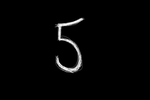

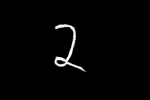

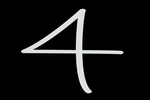

In [70]:
import PIL.ImageOps 

# load image files into array and print images from test-data2
images2 = []
all_files2 = os.listdir('test-data2')
for file in all_files2:
  if(file.endswith(".jpg") or file.endswith(".jpeg")):
    img = Image.open(os.path.join('test-data2', file))
    img = img.resize((150, 100), Image.ANTIALIAS)
    img = PIL.ImageOps.invert(img)
    display(img)
    img.save(os.path.join('test-data2-new', file))
    images2.append(os.path.join('test-data2-new', file))

In [71]:
# run multiple image prediction on test-data2
predictions2 = prediction.predictMultipleImages(images2, result_count_per_image=3)

# print resuts for all images
for result in predictions2:
  pred2, probability2 = result["predictions"], result["percentage_probabilities"]
  for index in range(len(pred2)):
    print(pred2[index] , " : " , probability2[index])
  print("-----------------------")

5  :  97.55802750587463
1  :  1.0391892865300179
8  :  0.6439631339162588
-----------------------
1  :  96.87443375587463
2  :  1.4837860129773617
9  :  0.6688527762889862
-----------------------
4  :  99.62502121925354
7  :  0.3557921387255192
1  :  0.009620194759918377
-----------------------


Our second data set also had pretty good predictions for the first and last image, but it did classify the second image incorrectly as a 1. We note that although we had good results, the amount of data and the training we did may not be enough to ensure maximum accuracy. 